# CIRCULANT MATRICES

# Content
- convolution
- Fourier transforms
- permutation matrices

Because of these connections, circulant matrices are widely used in machine learning, for example, in image processing. We begin by importing some Python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=3, suppress=True)

## Constructing a Circulant Matrix

To construct an $N\times N$ circulant matrix, we need only the first row, say,
$$
\begin{bmatrix}
c_0 & c_1 & c_2 & \dots & c_{N-1}
\end{bmatrix}
$$

After setting entries in the first row, the remaining rows of a circulant matrix are determined as follows:
$$
C = 
\begin{bmatrix}
c_0 & c_1 & c_2 & \dots & c_{N-1} \\
c_{N-1} & c_0 & c_1 & \dots & c_{N-2} \\
c_{N-2} & c_{N-1} & c_0 & \dots & c_{N-3} \\
\vdots & \vdots & \vdots & \dots & \vdots \\
c_1 & c_2 & c_3 & \dots & c_0 \\
\end{bmatrix}\tag{4.1}
$$

It is also possible to construct a circulant matrix by creating the transpose of the above matrix, in which case only the first column needs to be specified. Let’s write some Python code to generate a circulant matrix.

In [3]:
def construct_cirlulant(row):
    N = row.size
    C = np.empty((N, N))

    for i in range(N):
        C[i, i:] = row[:N-i]
        C[i, :i] = row[N-i:]

    return C

In [4]:
# a simple case when N = 3
construct_cirlulant(np.array([1., 2., 3.]))

array([[1., 2., 3.],
       [3., 1., 2.],
       [2., 3., 1.]])

### Some Properties of Circulant Matrices

Here are some useful properties:

Suppose that $A$ and $B$ are both circulant matrices. Then it can be verified that

- The transpose of a circulant matrix is a circulant matrix.
- $A+B$ is a circulant matrix
- $AB$ is a circulant matrix
- $AB = BA$

Now consider a circulant matrix with first row
$$
c = \begin{bmatrix}
c_0 & c_1 & c_2 & \dots & c_{N-1}
\end{bmatrix}
$$
and consider a vector
$$
a = \begin{bmatrix}
a_0 & a_1 & a_2 & \dots & a_{N-1}
\end{bmatrix}
$$

The **convolution** of vectors $c$ and $a$ is defined as the vector $b = c*a$ with components
$$
\begin{equation}
b_k = \sum_{i=0}^{n-1} c_{k-i} a_i
\end{equation}\tag{4.2}
$$

We use $*$ to denote **convolution** via the calculation described in equation (4.2). It can be verified that the vector $b$ satisfies
$$
b = C^Ta
$$

where $C^T$ is the transpose of the circulant matrix defined in equation (4.1).

## Connection to Permutation Matrix

A good way to construct a circulant matrix is to use a **permutation matrix**. Before defining a permutation matrix, we’ll define a permutation. A **permutation** of a set of the set of non-negative integers $\{0,1,2,...\}$ is a one-to-one mapping of the set into itself. A permutation of a set $\{1,2,...,n\}$ rearranges the $n$ integers in the set.

A [permutation matrix](https://mathworld.wolfram.com/PermutationMatrix.html) is obtained by permuting the rows of an $n\times n$ identity matrix according to a permutation of the numbers $1$ to $n$. Thus, every row and every column contain precisely a single $1$ with $0$ everywhere else.

Every permutation corresponds to a unique permutation matrix.

For example, the $N\times N$ matrix
$$
P = 
\begin{bmatrix}
0 & 1 & 0 & 0 & \dots & 0\\
0 & 0 & 1 & 0 & \dots & 0\\
0 & 0 & 0 & 1 & \dots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \dots & 1\\
1 & 0 & 0 & 0 & \dots & 0\\
\end{bmatrix}
$$

serves as a **cyclic shift** operator that, when applied to an $N\times 1$ vector $h$, shifts entries in rows $2$ through $N$ up one row and shifts the entry in row $1$ to row $N$.

Eigenvalues of the cyclic shift permutation matrix $P$ defined in equation (4.3) can be computed by constructing
$$
P-\lambda I = 
\begin{bmatrix}
-\lambda & 1 & 0 & 0 & \dots & 0\\
0 & -\lambda & 1 & 0 & \dots & 0\\
0 & 0 & -\lambda & 1 & \dots & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \dots & 1\\
1 & 0 & 0 & 0 & \dots & -\lambda\\
\end{bmatrix}
$$
and solving
$$
\det (P-\lambda I) = (-1)^{N}\lambda^N -1 = 0
$$
Eigenvalues $\lambda_i$ can be complex. Magnitudes $|\lambda_i|$ of these eigenvalues $\lambda_i$ all equal $1$. Thus, **singular values** of the permutation matrix $P$ defined in equation (4.3) all equal $1$.

It can be verified that permutation matrices are orthogonal matrices:
$$
PP'=1
$$

## Examples with Python

In [5]:
def construct_P(N):

    P = np.zeros((N, N))

    for i in range(N-1):
        P[i, i+1] = 1
    P[-1, 0] = 1

    return P

In [6]:
P4 = construct_P(4)
P4

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [8]:
# compute the eigenvalues and eigenvectors
lambda_, Q = np.linalg.eig(P4)

In [9]:
for i in range(4):
    print(f'lambda_{i} = {lambda_[i]:.1f} \nvec{i} = {Q[i, :]}\n')

lambda_0 = -1.0+0.0j 
vec0 = [-0.5+0.j   0. -0.5j  0. +0.5j -0.5+0.j ]

lambda_1 = 0.0+1.0j 
vec1 = [ 0.5+0.j  0.5+0.j  0.5-0.j -0.5+0.j]

lambda_2 = 0.0-1.0j 
vec2 = [-0.5+0.j  -0. +0.5j -0. -0.5j -0.5+0.j ]

lambda_3 = 1.0+0.0j 
vec3 = [ 0.5+0.j -0.5+0.j -0.5-0.j -0.5+0.j]



In graphs below, we shall portray eigenvalues of a shift permutation matrix in the complex plane. These eigenvalues are uniformly distributed along the unit circle. They are the $n$ **roots of unity**, meaning they are the $n$ numbers $z$ that solve $z^n=1$, where $z$ is a complex number.

In particular, the $n$ roots of unity are
$$
z = \exp\left(\frac{2\pi jk}{N}\right), k=0,...,N-1
$$
where $j$ denotes the purely imaginary unit number.

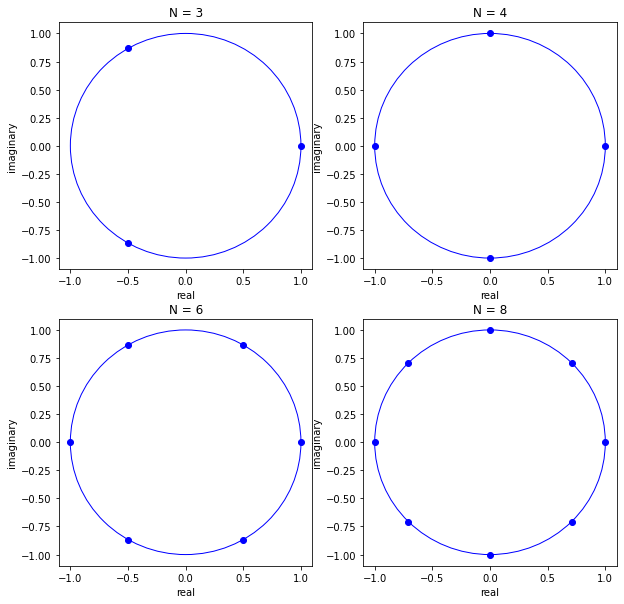

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, N in enumerate([3, 4, 6, 8]):

    row_i = i // 2
    col_i = i % 2

    P = construct_P(N)
    lambda_, Q = np.linalg.eig(P)

    circ = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
    ax[row_i, col_i].add_patch(circ)

    for j in range(N):
        ax[row_i, col_i].scatter(lambda_[j].real, lambda_[j].imag, c='b')

    ax[row_i, col_i].set_title(f'N = {N}')
    ax[row_i, col_i].set_xlabel('real')
    ax[row_i, col_i].set_ylabel('imaginary')

plt.show()

For a vector of coefficients $\{c_i\}_{i=0}^{n-1}$, eigenvectors of $P$ are also eigenvectors of
$$
C = c_0I + c_1P+c_2P^2 +\dots c_{N-1}P^{N-1}
$$
Consider an example in which $N=8$ and let $w=e^{-2\pi j/N}$.

It can be verified that the matrix $F_8$ of eigenvectors of $P_8$ is
$$
F_8 = 
\begin{bmatrix}
1 & 1 & 1 & \dots & 1\\
1 & w & w^2 & \dots & w^7\\
1 & w^2 & w^4 & \dots & w^{14}\\
1 & w^3 & w^6 & \dots & w^{21}\\
1 & w^4 & w^8 & \dots & w^{28}\\
1 & w^5 & w^{10} & \dots & w^{35}\\
1 & w^6 & w^{12} & \dots & w^{42}\\
1 & w^7 & w^{14} & \dots & w^{49}\\
\end{bmatrix}
$$

The matrix $F_8$ defines a [Discete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). To convert it into an orthogonal eigenvector matrix, we can simply normalize it by dividing every entry by $\sqrt 8$.
- stare at the first column $F_8$ of above to convince yourself of this fact

The eigenvalues corresponding to each eigenvector are $\{w^j\}_{j=0}^{7}$ in order.

In [11]:
def construct_F(N):
    w = np.e ** (-complex(0, 2*np.pi/N))
    F = np.ones((N, N), dtype=complex)
    
    for i in range(1, N):
        F[i, 1:] = w ** (i * np.arange(1, N))

    return F, w

In [12]:
F8, w = construct_F(8)

In [13]:
w

(0.7071067811865476-0.7071067811865475j)

In [14]:
F8

array([[ 1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ,
         1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ,  1.   +0.j   ],
       [ 1.   +0.j   ,  0.707-0.707j,  0.   -1.j   , -0.707-0.707j,
        -1.   -0.j   , -0.707+0.707j, -0.   +1.j   ,  0.707+0.707j],
       [ 1.   +0.j   ,  0.   -1.j   , -1.   -0.j   , -0.   +1.j   ,
         1.   +0.j   ,  0.   -1.j   , -1.   -0.j   , -0.   +1.j   ],
       [ 1.   +0.j   , -0.707-0.707j, -0.   +1.j   ,  0.707-0.707j,
        -1.   -0.j   ,  0.707+0.707j,  0.   -1.j   , -0.707+0.707j],
       [ 1.   +0.j   , -1.   -0.j   ,  1.   +0.j   , -1.   -0.j   ,
         1.   +0.j   , -1.   -0.j   ,  1.   +0.j   , -1.   -0.j   ],
       [ 1.   +0.j   , -0.707+0.707j,  0.   -1.j   ,  0.707+0.707j,
        -1.   -0.j   ,  0.707-0.707j, -0.   +1.j   , -0.707-0.707j],
       [ 1.   +0.j   , -0.   +1.j   , -1.   -0.j   ,  0.   -1.j   ,
         1.   +0.j   , -0.   +1.j   , -1.   -0.j   ,  0.   -1.j   ],
       [ 1.   +0.j   ,  0.707+0.707j, -0.

In [15]:
# normalize
Q8 = F8 / np.sqrt(8)

In [16]:
# verify the orthogonality (unitarity)
Q8 @ np.conjugate(Q8)

array([[ 1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [-0.-0.j,  1.-0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,  0.+0.j,
         0.+0.j],
       [-0.-0.j, -0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
         0.+0.j],
       [-0.-0.j, -0.-0.j, -0.-0.j,  1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,  1.-0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [ 0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,  1.-0.j, -0.+0.j,
        -0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,  1.+0.j,
        -0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j, -0.-0.j,
         1.+0.j]])

Let’s verify that $k$ th column of $Q_8$ is an eigenvector of $P_8$ with an eigenvalue $w^k$.

In [17]:
P8 = construct_P(8)

In [18]:
diff_arr = np.empty(8, dtype=complex)
for j in range(8):
    diff = P8 @ Q8[:, j] - w ** j * Q8[:, j]
    diff_arr[j] = diff @ diff.T

In [19]:
diff_arr

array([ 0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
       -0.+0.j])

## Associated Permutation Matrix
Next, we execute calculations to verify that the circulant matrix $C$ defined in equation (4.1) can be written as
$$
C = c_0I + c_1P+c_2P^2 +\dots c_{n-1}P^{n-1}
$$
and that every eigenvector of $P$ is also an eigenvector of $C$.

We illustrate this for $N=8$ case.

In [20]:
c = np.random.random(8)

In [21]:
c

array([0.238, 0.118, 0.325, 0.658, 0.949, 0.186, 0.943, 0.312])

In [22]:
C8 = construct_cirlulant(c)

Compute $
C = c_0I + c_1P+c_2P^2 +\dots c_{n-1}P^{n-1}
$.

In [23]:
N = 8

C = np.zeros((N, N))
P = np.eye(N)

for i in range(N):
    C += c[i] * P
    P = P8 @ P

In [24]:
C

array([[0.238, 0.118, 0.325, 0.658, 0.949, 0.186, 0.943, 0.312],
       [0.312, 0.238, 0.118, 0.325, 0.658, 0.949, 0.186, 0.943],
       [0.943, 0.312, 0.238, 0.118, 0.325, 0.658, 0.949, 0.186],
       [0.186, 0.943, 0.312, 0.238, 0.118, 0.325, 0.658, 0.949],
       [0.949, 0.186, 0.943, 0.312, 0.238, 0.118, 0.325, 0.658],
       [0.658, 0.949, 0.186, 0.943, 0.312, 0.238, 0.118, 0.325],
       [0.325, 0.658, 0.949, 0.186, 0.943, 0.312, 0.238, 0.118],
       [0.118, 0.325, 0.658, 0.949, 0.186, 0.943, 0.312, 0.238]])

In [25]:
C8

array([[0.238, 0.118, 0.325, 0.658, 0.949, 0.186, 0.943, 0.312],
       [0.312, 0.238, 0.118, 0.325, 0.658, 0.949, 0.186, 0.943],
       [0.943, 0.312, 0.238, 0.118, 0.325, 0.658, 0.949, 0.186],
       [0.186, 0.943, 0.312, 0.238, 0.118, 0.325, 0.658, 0.949],
       [0.949, 0.186, 0.943, 0.312, 0.238, 0.118, 0.325, 0.658],
       [0.658, 0.949, 0.186, 0.943, 0.312, 0.238, 0.118, 0.325],
       [0.325, 0.658, 0.949, 0.186, 0.943, 0.312, 0.238, 0.118],
       [0.118, 0.325, 0.658, 0.949, 0.186, 0.943, 0.312, 0.238]])

Now let’s compute the difference between two circulant matrices that we have constructed in two different ways.

In [26]:
np.abs(C - C8).max()

0.0

The $k$ th column of $P_8$ associated with eigenvalue $w^{k-1}$ is an eigenvector of $C_8$ associated with an eigenvalue 
$\sum_{h=0}^7c_jw^{hk}$.

In [27]:
lambda__C8 = np.zeros(8, dtype=complex)

for j in range(8):
    for k in range(8):
        lambda__C8[j] += c[k] * w ** (j * k)

In [28]:
lambda__C8

array([ 3.728+0.j   , -1.004+0.421j, -0.081+0.666j, -0.419-0.814j,
        1.183+0.j   , -0.419+0.814j, -0.081-0.666j, -1.004-0.421j])

We can verify this by comparing C8 @ Q8[:, j] with lambda__C8[j] * Q8[:, j].

In [29]:
# verify
for j in range(8):
    diff = C8 @ Q8[:, j] - lambda__C8[j] * Q8[:, j]
    print(diff)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
[ 0.+0.j  0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.+0.j -0.+0.j]
[ 0.-0.j -0.-0.j -0.-0.j -0.+0.j  0.-0.j -0.-0.j -0.-0.j -0.+0.j]
[ 0.+0.j  0.-0.j -0.-0.j -0.+0.j  0.-0.j -0.-0.j  0.+0.j  0.-0.j]
[ 0.+0.j  0.-0.j  0.-0.j -0.+0.j  0.-0.j  0.+0.j -0.-0.j  0.+0.j]
[ 0.+0.j -0.-0.j  0.-0.j  0.+0.j -0.-0.j  0.-0.j -0.+0.j -0.-0.j]
[ 0.+0.j  0.-0.j  0.-0.j  0.+0.j -0.+0.j  0.-0.j  0.-0.j  0.+0.j]
[-0.+0.j -0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.-0.j  0.+0.j  0.+0.j]


## Discrete Fourier Transform

The **Discrete Fourier Transform** (DFT) allows us to represent a discrete time sequence as a weighted sum of complex sinusoids. Consider a sequence of $N$ real number $\{x_j\}_{j=0}^{N-1}$.

The Discrete Fourier Transform maps $\{x_j\}_{j=0}^{N-1}$ into a sequence of complex numbers $\{X_k\}_{k=0}^{N-1}$ where
$$
X_k = \sum_{n=0}^{N-1}x_n \exp \left(-2\pi\frac{kn}{N}i\right)
$$

In [30]:
def DFT(x):
    "The discrete Fourier transform."

    N = len(x)
    w = np.e ** (-complex(0, 2*np.pi/N))

    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * w ** (k * n)

    return X

Consider the following example.
$$
x_n = 
\begin{cases}
\frac{1}{2} & n=0,1\\
0 & otherwise
\end{cases}
$$

In [31]:
x = np.zeros(10)
x[0:2] = 1/2

In [32]:
x

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

Apply a discrete Fourier transform.

In [33]:
X = DFT(x)

In [34]:
X

array([ 1.   +0.j   ,  0.905-0.294j,  0.655-0.476j,  0.345-0.476j,
        0.095-0.294j, -0.   +0.j   ,  0.095+0.294j,  0.345+0.476j,
        0.655+0.476j,  0.905+0.294j])

We can plot magnitudes of a sequence of numbers and the associated discrete Fourier transform

In [35]:
def plot_magnitude(x=None, X=None):

    data = []
    names = []
    xs = []
    if (x is not None):
        data.append(x)
        names.append('x')
        xs.append('n')
    if (X is not None):
        data.append(X)
        names.append('X')
        xs.append('j')

    num = len(data)
    for i in range(num):
        n = data[i].size
        plt.figure(figsize=(8, 3))
        plt.scatter(range(n), np.abs(data[i]))
        plt.vlines(range(n), 0, np.abs(data[i]), color='b')

        plt.xlabel(xs[i])
        plt.ylabel('magnitude')
        plt.title(names[i])
        plt.show()

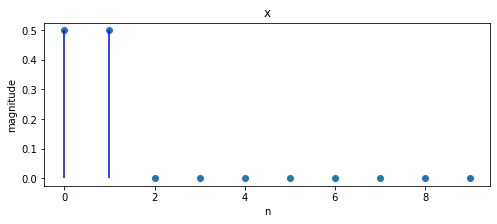

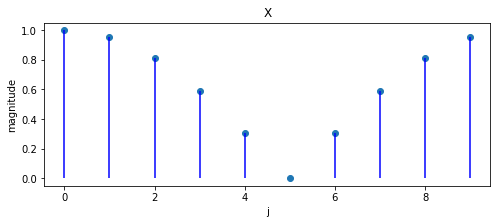

In [36]:
plot_magnitude(x=x, X=X)

The **inverse Fourier transform** transforms a Fourier transform $X$ of $x$ back to $x$. The inverse Fourier transform is defined as
$$
x_n = \sum_{k=0}^{N-1}\frac{1}{N}X_k\exp\left(2\pi\left(\frac{kn}{N}\right)i\right), n=0,1,...,N-1
$$

In [37]:
def inverse_transform(X):

    N = len(X)
    w = np.e ** (complex(0, 2*np.pi/N))

    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * w ** (k * n) / N

    return x

In [38]:
inverse_transform(X)

array([ 0.5+0.j,  0.5-0.j, -0. -0.j, -0. -0.j, -0. -0.j, -0. -0.j,
       -0. +0.j, -0. +0.j, -0. +0.j, -0. +0.j])

Another example is
$$
x_n = 2\cos\left( 2\pi\frac{11}{40}n \right), n=0,1,2,...,19
$$
Since $N=20$, we cannot use an integer multiple of $\frac{1}{20}$ to represent a frequency $\frac{11}{40}$. To handle this, we shall end up using all $N$ of the availble frequencies in the DFT.

Since $\frac{11}{40}$ is in between $\frac{10}{40}$ and $\frac{12}{40}$ (each of which is an integer multiple of $\frac{1}{20}$), the complex coefficients in the DFT have their largest magnitudes at $k=5,6,...,15,16$, not just at a single frequency.

In [39]:
N = 20
x = np.empty(N)

for j in range(N):
    x[j] = 2 * np.cos(2 * np.pi * 11 * j / 40)

In [40]:
X = DFT(x)

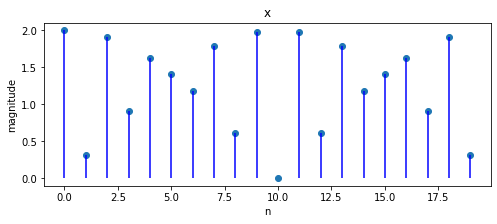

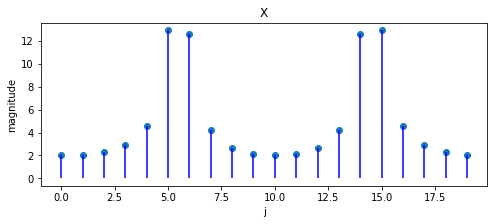

In [41]:
plot_magnitude(x=x, X=X)

What happens if we change the last example to $x_n = 2\cos\left( 2\pi\frac{10}{40}n \right)$?

Note that $\frac{10}{40}$ is an integer multiple of $\frac{1}{20}$.

In [42]:
N = 20
x = np.empty(N)

for j in range(N):
    x[j] = 2 * np.cos(2 * np.pi * 10 * j / 40)

In [43]:
X = DFT(x)

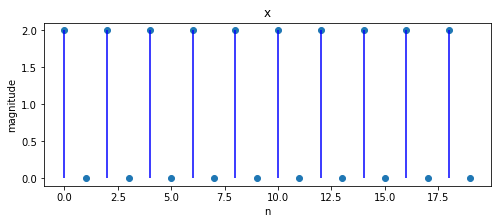

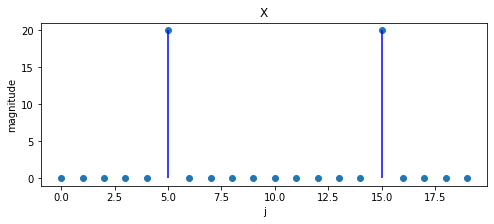

In [44]:
plot_magnitude(x=x, X=X)

If we represent the discrete Fourier transform as a matrix, we discover that it equals the matrix $F_N$ of eigenvectors of the permutation matrix $P_N$.

We can use the example where $x_n = 2\cos\left( 2\pi\frac{10}{40}n \right)$, $n=0,1,2,...,19$ to illustrate this.

In [45]:
N = 20
x = np.empty(N)

for j in range(N):
    x[j] = 2 * np.cos(2 * np.pi * 11 * j / 40)

In [46]:
x

array([ 2.   , -0.313, -1.902,  0.908,  1.618, -1.414, -1.176,  1.782,
        0.618, -1.975, -0.   ,  1.975, -0.618, -1.782,  1.176,  1.414,
       -1.618, -0.908,  1.902,  0.313])

First use the summation formula to transform $x$ to $X$.

In [47]:
X = DFT(x)
X

array([2. +0.j   , 2. +0.558j, 2. +1.218j, 2. +2.174j, 2. +4.087j,
       2.+12.785j, 2.-12.466j, 2. -3.751j, 2. -1.801j, 2. -0.778j,
       2. -0.j   , 2. +0.778j, 2. +1.801j, 2. +3.751j, 2.+12.466j,
       2.-12.785j, 2. -4.087j, 2. -2.174j, 2. -1.218j, 2. -0.558j])

Now let’s evaluate the outcome of postmultiplying the eigenvector matrix $F_20$ by the vector $x$, a product that we claim should equal the Fourier tranform of the sequence $\{X_k\}_{k=0}^{N-1}$.

In [48]:
F20, _ = construct_F(20)

In [49]:
F20 @ x

array([2. +0.j   , 2. +0.558j, 2. +1.218j, 2. +2.174j, 2. +4.087j,
       2.+12.785j, 2.-12.466j, 2. -3.751j, 2. -1.801j, 2. -0.778j,
       2. -0.j   , 2. +0.778j, 2. +1.801j, 2. +3.751j, 2.+12.466j,
       2.-12.785j, 2. -4.087j, 2. -2.174j, 2. -1.218j, 2. -0.558j])

Similarly, the inverse DFT can be expressed as a inverse DFT matrix $F_{20}^{-1}$.

In [50]:
F20_inv = np.linalg.inv(F20)
F20_inv @ X

array([ 2.   +0.j, -0.313+0.j, -1.902+0.j,  0.908+0.j,  1.618+0.j,
       -1.414+0.j, -1.176-0.j,  1.782-0.j,  0.618+0.j, -1.975+0.j,
       -0.   -0.j,  1.975+0.j, -0.618+0.j, -1.782-0.j,  1.176-0.j,
        1.414+0.j, -1.618+0.j, -0.908-0.j,  1.902-0.j,  0.313+0.j])